In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
#POPULATION

population=pd.read_csv('../csv/death_pollution/population_by_province.csv', encoding='utf-8')
population['Territorio']=population['Territorio'].replace({"Valle d'Aosta / Vallée d'Aoste":"Aosta"})
population['Territorio']=population['Territorio'].replace({"Bolzano / Bozen":"Bolzano"})
population['Territorio']=population['Territorio'].replace({"Forlì-Cesena":"Forlì"})
population['Territorio']=population['Territorio'].replace({"Massa-Carrara":"Massa"})
population['Territorio']=population['Territorio'].replace({"Monza e della Brianza":"Monza"})
population['Territorio']=population['Territorio'].replace({"Pesaro e Urbino":"Pesaro"})
population['Territorio']=population['Territorio'].replace({"Reggio di Calabria":"Reggio Calabria"})
population['Territorio']=population['Territorio'].replace({"Reggio nell'Emilia":"Reggio Emilia"})
population['Territorio']=population['Territorio'].replace({"Verbano-Cusio-Ossola":"Verbania"})

#Clean rows
population.drop(population.index[(population["Stato civile"]!="totale")], axis=0, inplace=True)
population.drop(population.index[(population["ETA1"]!="TOTAL")], axis=0, inplace=True)
#Clean columns
population.drop("ITTER107",axis=1,inplace=True)
population.drop("TIPO_DATO15",axis=1,inplace=True)
population.drop("SEXISTAT1",axis=1,inplace=True)
population.drop("STATCIV2",axis=1,inplace=True)
population.drop("TIME",axis=1,inplace=True)
population.drop("Flag Codes",axis=1,inplace=True)
population.drop("Flags",axis=1,inplace=True)
population.drop("Seleziona periodo",axis=1,inplace=True)
population.drop("Stato civile",axis=1,inplace=True)
population.drop("Tipo di indicatore demografico",axis=1,inplace=True)
population.drop("Sesso",axis=1,inplace=True)
population.drop("ETA1",axis=1,inplace=True)
population.drop("Età",axis=1,inplace=True)

#DEATHS
death=pd.read_csv('../csv/death_pollution/premature_deaths.csv', encoding='utf-8')
death['Territorio']=death['Territorio'].replace({"Valle d'Aosta / Vallée d'Aoste":"Aosta"})
death['Territorio']=death['Territorio'].replace({"Bolzano / Bozen":"Bolzano"})
death['Territorio']=death['Territorio'].replace({"Forlì-Cesena":"Forlì"})
death['Territorio']=death['Territorio'].replace({"Massa-Carrara":"Massa"})
death['Territorio']=death['Territorio'].replace({"Monza e della Brianza":"Monza"})
death['Territorio']=death['Territorio'].replace({"Pesaro e Urbino":"Pesaro"})
death['Territorio']=death['Territorio'].replace({"Reggio di Calabria":"Reggio Calabria"})
death['Territorio']=death['Territorio'].replace({"Reggio nell'Emilia":"Reggio Emilia"})
death['Territorio']=death['Territorio'].replace({"Verbano-Cusio-Ossola":"Verbania"})
death=death.sort_values(by=["Territorio"], ascending=True)
#Clean rows
death.drop(death.index[(death["Titolo di studio"]!="totale")], axis=0, inplace=True)
death.drop(death.index[(death["Paese di cittadinanza"]!="Totale")], axis=0, inplace=True)
death.drop(death.index[(death["Stato civile"]!="totale")], axis=0, inplace=True)
death.drop(death.index[(death["Territorio"]=="Sud Sardegna")], axis=0, inplace=True)
death.drop(death.index[(death["Paese di nascita"]!="Mondo")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="TOTAL")], axis=0, inplace=True)
#Delete young people from the count
death.drop(death.index[(death["ETA1"]=="Y_UN4")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y5-9")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y10-14")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y15-19")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y20-24")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y25-29")], axis=0, inplace=True)
#Delete old people from the count
death.drop(death.index[(death["ETA1"]=="Y75-79")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y70-74")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y65-69")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y60-64")], axis=0, inplace=True)
#Clean columns
death.drop("ITTER107",axis=1,inplace=True)
death.drop("TIPO_DATO15",axis=1,inplace=True)
death.drop("Tipo dato",axis=1,inplace=True)
death.drop("SEXISTAT1",axis=1,inplace=True)
death.drop("STATCIV2",axis=1,inplace=True)
death.drop("TITOLO_STUDIO",axis=1,inplace=True)
death.drop("TIME",axis=1,inplace=True)
death.drop("Flag Codes",axis=1,inplace=True)
death.drop("Flags",axis=1,inplace=True)
death.drop("Seleziona periodo",axis=1,inplace=True)

death=death.groupby(by='Territorio').sum().reset_index()

#Inner-join between 'data' from death and population
result=pd.merge(death,population,on='Territorio')

#Create mortality index every 10000 people
result['Value_x']=(result['Value_x']/result['Value_y'])*10000

In [6]:
def mean(pollutant):
    #POLLUTION
    pollution = pd.read_csv('../csv/pollution_province/'+pollutant+'_2019.csv')
    pollution = pollution[['Provincia', 'Valore medio annuo³ [µg/m³]']]
    pollution.drop(pollution.index[(pollution['Valore medio annuo³ [µg/m³]']=="-")], axis=0, inplace=True)
    pollution.drop(pollution.index[(pollution['Valore medio annuo³ [µg/m³]']=="n.d.")], axis=0, inplace=True)
    pollution['Valore medio annuo³ [µg/m³]'] = pollution['Valore medio annuo³ [µg/m³]'].apply(int)
    pollution = pollution.groupby(by='Provincia').mean()
    '''
    pollution=pd.read_csv('../csv/Foglio_Chino.csv', encoding='utf-8', sep=',')
    pollution=pollution.rename(columns={"Unnamed: 0":"Territorio","Unnamed: 1":"VOTO","2018":"Pm10 2018","Unnamed: 3":"Pm2.5 2018",
    "Unnamed: 4":"NO2 2018","2017":"Pm10 2017","Unnamed: 6":"Pm2.5 2017", "Unnamed: 7":"NO2 2017",
    "2016":"Pm10 2016","Unnamed: 9":"Pm2.5 2016", "Unnamed: 10":"NO2 2016",
    "2015":"Pm10 2015","Unnamed: 12":"Pm2.5 2015", "Unnamed: 13":"NO2 2015",
    "2014":"Pm10 2014","Unnamed: 15":"Pm2.5 2014", "Unnamed: 16":"NO2 2014"})
    #Skip first row
    pollution=pollution.iloc[1:]
    '''
    #Inner-join between 'data' from result and pollution
    result2=pd.merge(result,pollution,left_on='Territorio', right_on='Provincia')
    #result2=result2.sort_values(by=[pollutant], ascending=True)
    #result2['Valore medio annuo³ [µg/m³]'] = result2['Valore medio annuo³ [µg/m³]'].apply(int)
    result2.plot.scatter(y='Value_x', x='Valore medio annuo³ [µg/m³]')
    plt.ylabel('Death rate every 10000 people')
    plt.show()
    
    b = np.array(result2['Value_x']).astype(float)
    a = np.array(result2['Valore medio annuo³ [µg/m³]']).astype(float)
    #Pearson
    print(scipy.stats.pearsonr(a, b))
    #Spearman
    print(scipy.stats.spearmanr(a, b))
    #Kendall
    print(scipy.stats.kendalltau(a, b))

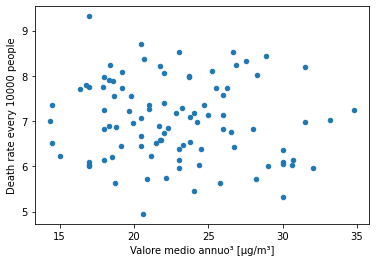

(-0.10572719497135288, 0.30526051695445344)
SpearmanrResult(correlation=-0.10483255758098112, pvalue=0.3093941467037263)
KendalltauResult(correlation=-0.06741645187048648, pvalue=0.33262195908042236)


/home/marco/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


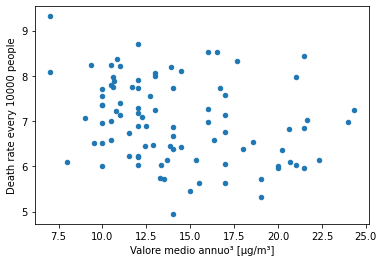

(-0.2761125449708886, 0.0080671360533663)
SpearmanrResult(correlation=-0.301364769064635, pvalue=0.0036971805786964376)
KendalltauResult(correlation=-0.20325481108178295, pvalue=0.004782507860807013)


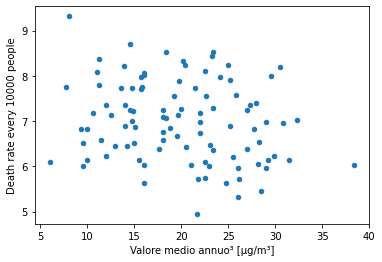

(-0.20988075595351866, 0.03805907532489958)
SpearmanrResult(correlation=-0.19487156719323628, pvalue=0.05449819992682528)
KendalltauResult(correlation=-0.12384012820730797, pvalue=0.07155317142281796)


In [7]:
#2019
mean('PM10')
mean('PM25')
mean('NO2')

In [8]:
def over(pollutant):
    #POLLUTION
    pollution = pd.read_csv('../csv/pollution_province/'+pollutant+'_2019.csv')
    pollution = pollution[['Provincia', 'Over']]
    pollution.drop(pollution.index[(pollution['Over']=="-")], axis=0, inplace=True)
    pollution.drop(pollution.index[(pollution['Over']=="n.d.")], axis=0, inplace=True)
    pollution['Over'] = pollution['Over'].apply(int)
    pollution = pollution.groupby(by='Provincia').max()
    '''
    pollution=pd.read_csv('../csv/Foglio_Chino.csv', encoding='utf-8', sep=',')
    pollution=pollution.rename(columns={"Unnamed: 0":"Territorio","Unnamed: 1":"VOTO","2018":"Pm10 2018","Unnamed: 3":"Pm2.5 2018",
    "Unnamed: 4":"NO2 2018","2017":"Pm10 2017","Unnamed: 6":"Pm2.5 2017", "Unnamed: 7":"NO2 2017",
    "2016":"Pm10 2016","Unnamed: 9":"Pm2.5 2016", "Unnamed: 10":"NO2 2016",
    "2015":"Pm10 2015","Unnamed: 12":"Pm2.5 2015", "Unnamed: 13":"NO2 2015",
    "2014":"Pm10 2014","Unnamed: 15":"Pm2.5 2014", "Unnamed: 16":"NO2 2014"})
    #Skip first row
    pollution=pollution.iloc[1:]
    '''
    #Inner-join between 'data' from result and pollution
    result2=pd.merge(result,pollution,left_on='Territorio', right_on='Provincia')
    #result2=result2.sort_values(by=[pollutant], ascending=True)
    result2.plot.scatter(y='Value_x', x='Over')
    plt.ylabel('Death rate every 10000 people')
    plt.xlabel('Time over legal limits')
    plt.show()
    
    a = np.array(result2['Value_x']).astype(float)
    b = np.array(result2['Over']).astype(float)
    #Pearson
    print(scipy.stats.pearsonr(a, b))
    #Spearman
    print(scipy.stats.spearmanr(a, b))
    #Kendall
    print(scipy.stats.kendalltau(a, b))

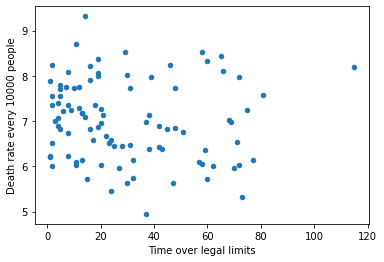

(-0.09290051595173071, 0.36798151313744165)
SpearmanrResult(correlation=-0.1519371285971574, pvalue=0.13947017370007947)
KendalltauResult(correlation=-0.11500078251689304, pvalue=0.09899847940588506)


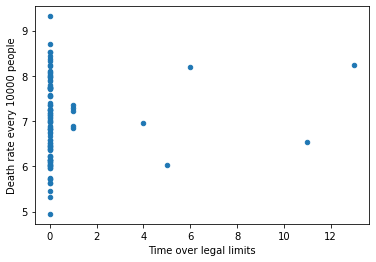

(0.08355780013845181, 0.4133579564746263)
SpearmanrResult(correlation=0.07502037729299323, pvalue=0.4628448233538648)
KendalltauResult(correlation=0.059939837170283436, pvalue=0.4640738469526452)


In [76]:
#2019
over('PM10')
over('NO2')